In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 지수 표기법을 10진수로 변경
pd.set_option('display.float_format', '{:.2f}'.format)

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'

# minus 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인

In [2]:
df_reviews = pd.read_csv('./data/myfipn_db_reviews.csv')
df_blog = pd.read_csv('./data/myfipn_db_blog.csv')

In [3]:
df_reviews = df_reviews.drop(columns='_id').drop_duplicates()
df_blog = df_blog.drop(columns='_id').drop_duplicates()

In [4]:
# reviews의 date는 'YYYY-MM-DD' 형식의 문자열
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# blog의 date는 'YYYYMMDD' 형식의 정수
df_blog['date'] = pd.to_datetime(df_blog['date'].astype(str), format='%Y%m%d')

# 두 데이터프레임에 month 컬럼 생성 (YYYY-MM 형식)
df_reviews['month'] = df_reviews['date'].dt.strftime('%Y-%m')
df_blog['month'] = df_blog['date'].dt.strftime('%Y-%m')

In [11]:
df_blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        1000 non-null   object        
 1   link         1000 non-null   object        
 2   description  1000 non-null   object        
 3   blogger      998 non-null    object        
 4   bloggerlink  1000 non-null   object        
 5   date         1000 non-null   datetime64[ns]
 6   month        1000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 54.8+ KB


# 시각화


통계 정보:
전체 리뷰 수: 4,736.0

제품별 총 리뷰 수:
product
픽싱 • 라운 그란데 - 애쉬 13.5 [원먼스/2PCS]      1278.00
픽싱 • 라운 그란데 - 베이지 13.5 [원먼스/2PCS]      430.00
픽싱 • 라운 - 애쉬 13.2 [원먼스/2PCS]           417.00
비브 벤티 - 차콜 13.8 [원데이/10PCS]            381.00
라운 그란데 - 애쉬 13.5 [원데이/10PCS]           288.00
픽싱 • 라운 그란데 - 카멜 13.5 [원먼스/2PCS]       275.00
비브 - 차콜 13.2 [원먼스/2PCS]                268.00
픽싱 • 라운 그란데 - 코발트블루 13.5 [원먼스/2PCS]    251.00
라운 - 애쉬 13.2 [원먼스/2PCS]                232.00
라운 - 애쉬 13.2 [원데이/10PCS]               209.00
라운 그란데 - 베이지 13.5 [원먼스/2PCS]           169.00
라운 그란데 - 카멜 13.5 [원먼스/2PCS]            158.00
라운 - 카멜 13.2 [원먼스/2PCS]                137.00
라운 그란데 - 베이지 13.5 [원데이/10PCS]           86.00
15:06 - 카카오 13.8 [원먼스/2PCS]             74.00
브릴레 - 카라멜 13.3 [원데이/10PCS]              49.00
파란티카 - 바이올렛 13.6 [원먼스/2PCS]             24.00
파란티카 - 애쉬 13.6 [원먼스/2PCS]                5.00
🎀헬로키티 • 블랙 13.2 [원데이/10PCS]              5.00
dtype: float64


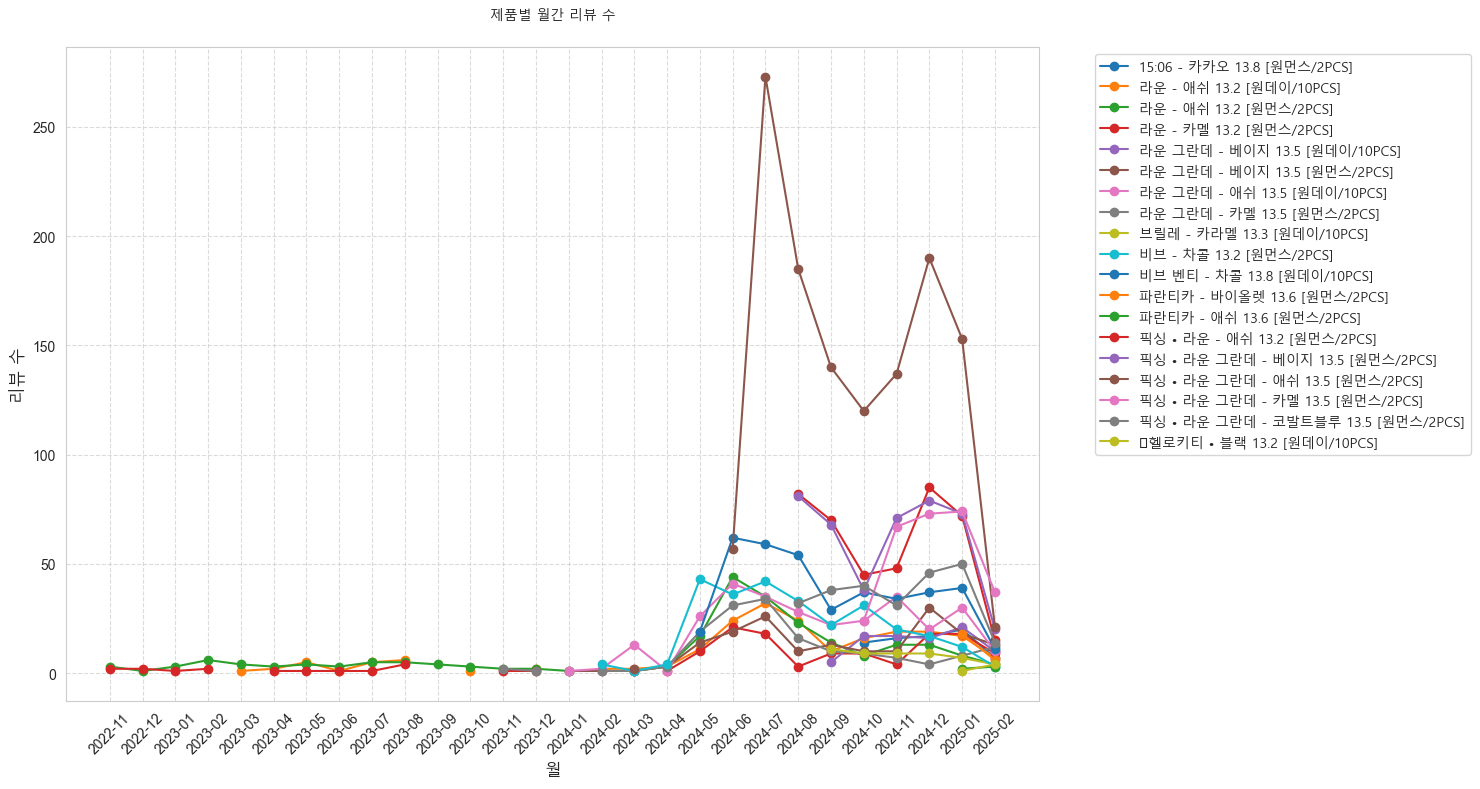

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# 폰트 설정
font_path = r'C:\Windows\Fonts\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 제품별 월간 리뷰 수 계산
monthly_counts = df_reviews.groupby(['month', 'product']).size().unstack()

# 시각화
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# 각 제품별로 다른 색상의 선으로 그리기
for column in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[column], marker='o', label=column)

# 각 요소에 직접 폰트 적용
plt.title('제품별 월간 리뷰 수', fontsize=15, pad=20, fontproperties=font_prop)
plt.xlabel('월', fontsize=12, fontproperties=font_prop)
plt.ylabel('리뷰 수', fontsize=12, fontproperties=font_prop)

# 범례에 폰트 적용
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_fontproperties(font_prop)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 통계 정보 출력
print("\n통계 정보:")
print(f"전체 리뷰 수: {monthly_counts.sum().sum():,}")
print("\n제품별 총 리뷰 수:")
print(monthly_counts.sum().sort_values(ascending=False))

plt.show()


통계 정보:
전체 게시글 수: 1,000

월별 게시글 수:
month
2024-12    111
2025-01    106
2024-07     80
2024-10     79
2024-08     71
2024-11     68
2024-06     65
2024-09     63
2024-04     55
2023-11     53
2024-03     51
2024-05     45
2024-02     39
2024-01     35
2025-02     33
2023-12     26
2023-10     20
dtype: int64


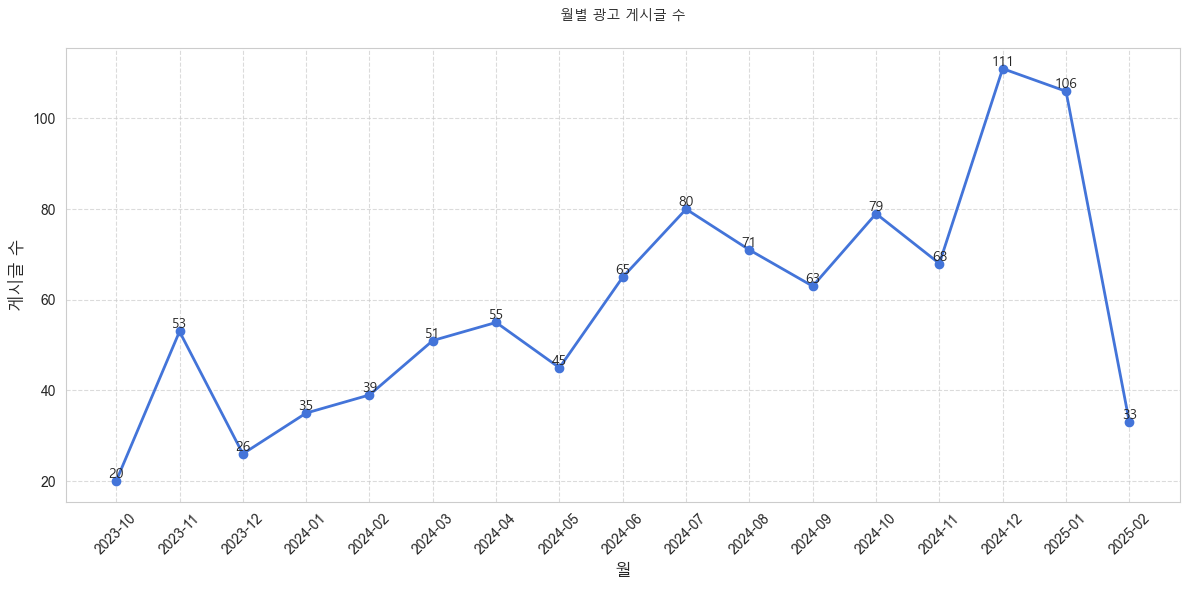

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# 폰트 설정
font_path = r'C:\Windows\Fonts\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 월별 게시글 수 계산
monthly_counts = df_blog.groupby('month').size()

# 시각화
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 선 그래프 그리기 
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, color='#4374D9')

# 각 포인트에 값 표시
for x, y in zip(monthly_counts.index, monthly_counts.values):
   plt.text(x, y, f'{y:,}', 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontproperties=font_prop)

# 각 요소에 직접 폰트 적용
plt.title('월별 광고 게시글 수', fontsize=15, pad=20, fontproperties=font_prop)
plt.xlabel('월', fontsize=12, fontproperties=font_prop)
plt.ylabel('게시글 수', fontsize=12, fontproperties=font_prop)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 통계 정보 출력
print("\n통계 정보:")
print(f"전체 게시글 수: {monthly_counts.sum():,}")
print("\n월별 게시글 수:")
print(monthly_counts.sort_values(ascending=False))

plt.show()